### Exploratory Data Analysis

Info about protocol types:

- https://www.pingplotter.com/wisdom/article/packet-type-differences

Look at attack types like Dos, Probe, U2R, R2L.

Look at data_description file to understand what features mean.

In [135]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("Train_data.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


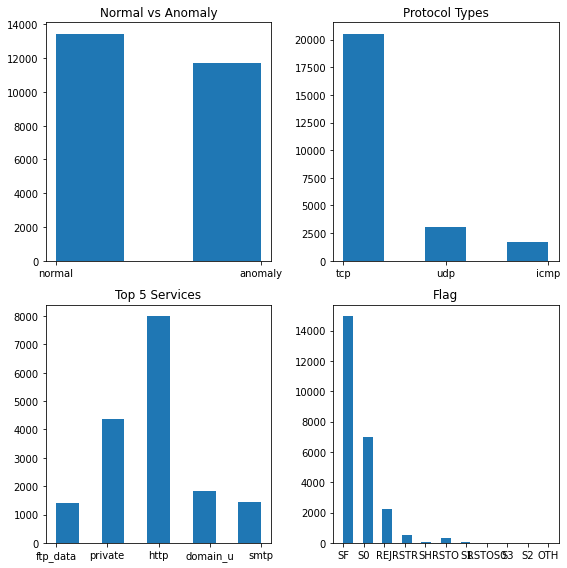

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))
bin_no = len(df["class"].unique())+1
ax[0,0].hist(df["class"],bins=bin_no)
ax[0,0].set_title("Normal vs Anomaly")

bin_no = len(df["protocol_type"].unique())+2
ax[0,1].hist(df["protocol_type"],bins=bin_no)
ax[0,1].set_title("Protocol Types")

bin_no = len(df["service"].unique())
top_services = list(df["service"].value_counts()[:5].keys())
ax[1,0].hist(df[df["service"].isin(top_services)]["service"],bins=9)
ax[1,0].set_title("Top 5 Services")

bin_no = len(df["flag"].unique())+10
ax[1,1].hist(df["flag"],bins=bin_no)
ax[1,1].set_title("Flag")

plt.tight_layout()
plt.show()

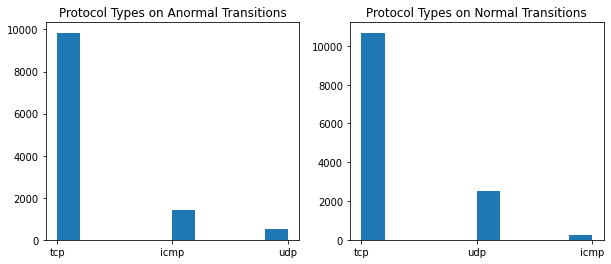

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].hist(df[df["class"]=="anomaly"]["protocol_type"])
ax[0].set_title("Protocol Types on Anormal Transitions")

ax[1].hist(df[df["class"]=="normal"]["protocol_type"])
ax[1].set_title("Protocol Types on Normal Transitions")
plt.show()

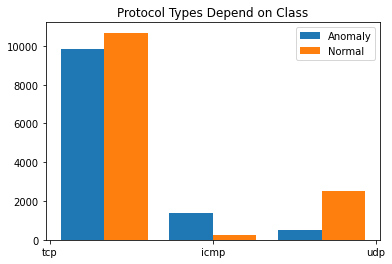

In [74]:
plt.hist([df[df["class"]=="anomaly"]["protocol_type"],
         df[df["class"]=="normal"]["protocol_type"]],label=["Anomaly", "Normal"], bins=3)
plt.legend()
plt.title("Protocol Types Depend on Class")
plt.show()

In [69]:
print(df[(df["class"]=="normal") & (df["protocol_type"]=="tcp")].shape[0],
df[(df["class"]=="anomaly") & (df["protocol_type"]=="tcp")].shape[0])

10681 9845


src_bytes: Number of data bytes transferred from source to destination in single connection

dst_bytes: Number of data bytes transferred from destination to source in single connection

In [81]:
df.groupby("class").sum()[["src_bytes","dst_bytes"]]/1000000 # mb

,src_bytes,dst_bytes
class,,
anomaly,459.693717,28.781860
normal,153.243469,59.184754


In [83]:
df["diff_src_dst_bytes"] = df["src_bytes"] - df["dst_bytes"]

In [90]:
df.groupby("class").sum()[["src_bytes","dst_bytes","diff_src_dst_bytes"]]/1000000 # mb

,src_bytes,dst_bytes,diff_src_dst_bytes
class,,,
anomaly,459.693717,28.781860,430.911857
normal,153.243469,59.184754,94.058715


In [91]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,diff_src_dst_bytes
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,491
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,146
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,0
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,-7921
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,-221


In [97]:
# If source and dest. ip and port is equal than this is 1 so there are 2.
# Land feature is unnecessary

df.land.value_counts()

0    25190
1        2
Name: land, dtype: int64

In [96]:
df[df.land==1]["class"]

13210     normal
16015    anomaly
Name: class, dtype: object

In [109]:
# Only in anomaly wrong fragment sent.

df.groupby("class").sum()["wrong_fragment"]

class
anomaly    598
normal       0
Name: wrong_fragment, dtype: int64

In [110]:
df.groupby("class").sum()["urgent"]

class
anomaly    1
normal     0
Name: urgent, dtype: int64

In [111]:
df["urgent"].value_counts()

0    25191
1        1
Name: urgent, dtype: int64

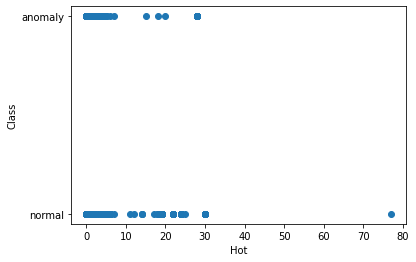

In [114]:
plt.scatter(df["hot"], df["class"])
plt.xlabel("Hot")
plt.ylabel("Class")
plt.show()

In [123]:
df.groupby("class").sum()["num_failed_logins"]

class
anomaly    14
normal     16
Name: num_failed_logins, dtype: int64

In [124]:
df.groupby("class").sum()["logged_in"]

class
anomaly     409
normal     9536
Name: logged_in, dtype: int64

In [143]:
df[(df["class"]=="anomaly") & (df["logged_in"]==0)].shape,df[(df["class"]=="anomaly") & (df["logged_in"]==1)].shape

((11334, 43), (409, 43))

In [144]:
df[(df["class"]=="normal") & (df["logged_in"]==0)].shape,df[(df["class"]=="normal") & (df["logged_in"]==1)].shape

((3913, 43), (9536, 43))

In [148]:
# There is no nan values.

df.isnull().any().sum()

0